In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vmc(states, betas):
    ixx = np.random.randint(N, size=nt)
    iyy = np.random.randint(N, size=nt)
    ixx_l = (ixx-1)%N
    ixx_r = (ixx+1)%N
    iyy_u = (iyy-1)%N
    iyy_d = (iyy+1)%N
    ss = states[np.arange(nt),ixx,iyy]
    nbs = np.zeros(nt)
    nbs += states[np.arange(nt),ixx_l,iyy]
    nbs += states[np.arange(nt),ixx_r,iyy]
    nbs += states[np.arange(nt),ixx,iyy_u]
    nbs += states[np.arange(nt),ixx,iyy_d]
    costs = 2*ss*nbs
    flips = 1 - 2*(np.random.rand(nt) < np.exp(-costs*betas)).astype(int)
    states[np.arange(nt),ixx,iyy] *= flips

In [3]:
def show_state(state):
    fig, ax = plt.subplots()
    ax.imshow(state)
    ax.axis('off')

# Let's use some numpy vectorize magic

In [4]:
# global parameters

eq_steps = 1000
N = 32
nt = 10000

In [5]:
temps = np.linspace(1.2, 3.5, nt)
betas = 1.0 / temps
phases = (temps > 2.269185314)

In [6]:
states = 2*np.random.randint(2, size=(nt, N, N)) - 1

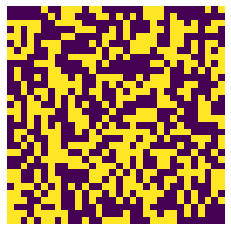

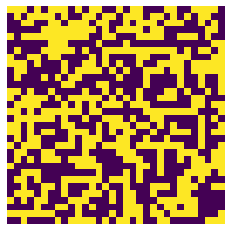

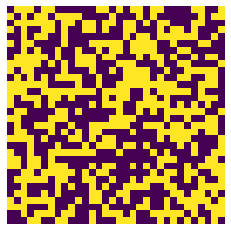

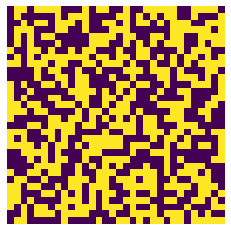

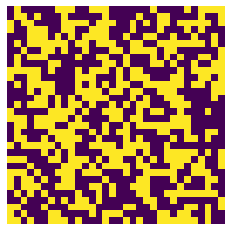

In [7]:
for state in states[::nt//5]:
    show_state(state)

In [8]:
%%time
for i in range(eq_steps*N*N):         # equilibrate
    vmc(states, betas)
    if (i%(N*N*eq_steps//100) == 0):
        print(f'{i//(N*N*eq_steps//100)}%')

0%
1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
CPU times: user 30min 8s, sys: 14 s, total: 30min 22s
Wall time: 37min 10s


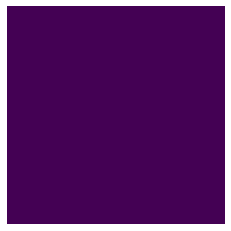

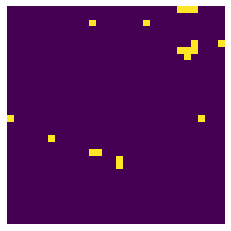

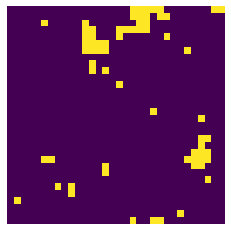

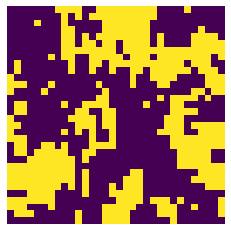

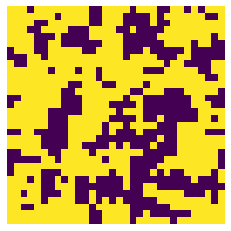

In [9]:
for state in states[::nt//5]:
    show_state(state)

In [10]:
import pandas as pd

states_reshaped = states.reshape(nt, N*N)
df = pd.DataFrame(np.hstack((states_reshaped, phases[:, None], betas[:, None])))

In [11]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
9995,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,0.285789
9996,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,0.285771
9997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.285752
9998,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.285733
9999,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,0.285714


In [12]:
dfshuffled = df.sample(frac=1)
train = dfshuffled[0:nt//2]
test = dfshuffled[nt//2:]

df.to_csv(f'Samples/N{N}steps{eq_steps}nt{nt}.csv', index=False)
train.to_csv(f'Samples/train_N{N}steps{eq_steps}nt{nt}.csv', index=False)
test.to_csv(f'Samples/test_N{N}steps{eq_steps}nt{nt}.csv', index=False)

# Physics shit

In [ ]:
def calcEnergy(config):
    #energy of a given configuration
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    #magnetization of a given configuration
    mag = np.sum(config)
    return mag

In [ ]:
mcSteps = 1024
T       = temps
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
E2, M2 = np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

for _ in range(mcSteps):
    for __ in range(N*N):
        vmc(states, betas)
    for i in range(nt):
        Ene = calcEnergy(states[i])     # calculate the energy
        Mag = calcMag(states[i])        # calculate the magnetisation

        E[i] += Ene
        M[i] += Mag
        M2[i] += Mag*Mag 
        E2[i] += Ene*Ene

C = (n1*E2 - n2*E*E)*betas*betas
X = (n1*M2 - n2*M*M)*betas
E *= n1 # averaged!
M *= n1

In [ ]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');